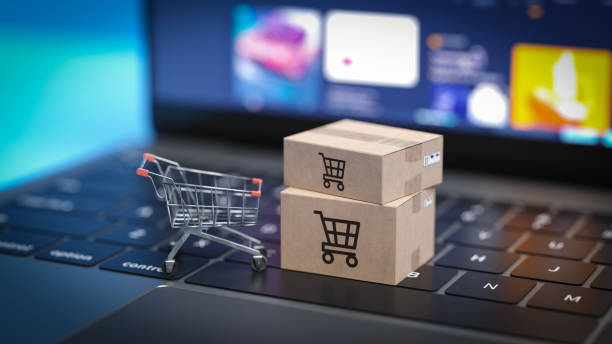


#Overview
In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make key business decisions.

#Project Scenario

In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products.

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

#Project Objectives

Describe data to answer key questions to uncover insights

Gain valuable insights that will help improve online retail performance

Provide analytic insights and data-driven recommendations

#Your Challenge

Your challenge will be to conduct an exploratory data analysis to help make key business decisions. To do this, you will load, clean, process, analyze, and visualize data. You will also pose questions, and seek to answer them meaningfully using the dataset provided.

In this project, we'll use a data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_excel('/content/Online Retail (1).xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Task
Perform a comprehensive exploratory data analysis (EDA) on the `df` DataFrame loaded from `/content/Online Retail (1).xlsx`. This analysis should include: data preprocessing and cleaning (handling missing values, converting data types, creating a 'Sales' column), calculating basic descriptive statistics, visualizing data distributions and relationships, analyzing sales trends over time, identifying top products and countries, detecting and discussing outliers, and finally summarizing all key findings and insights from the analysis.

## Data Preprocessing and Cleaning

### Subtask:
Handle missing values, convert data types, and create a 'Sales' column.


**Reasoning**:
The first instruction is to check for missing values across all columns in the DataFrame `df`. This will help us understand the data quality and identify columns that require cleaning.



In [ ]:
print("Missing values before cleaning:")
print(df.isnull().sum())

Missing values before cleaning:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


**Reasoning**:
Following the instructions, the next step is to drop rows where `CustomerID` is missing, as these rows are crucial for customer-centric analysis and cannot be easily imputed.



In [ ]:
df.dropna(subset=['CustomerID'], inplace=True)
print("Missing values after dropping CustomerID nulls:")
print(df.isnull().sum())

Missing values after dropping CustomerID nulls:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


**Reasoning**:
Since dropping rows with missing `CustomerID` also implicitly resolved missing values in `Description`, the next step is to convert the `InvoiceDate` column to datetime objects, as per the instructions, to enable time-series analysis.



In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
print("Data type of 'InvoiceDate' after conversion:")
print(df['InvoiceDate'].dtype)

Data type of 'InvoiceDate' after conversion:
datetime64[ns]


**Reasoning**:
Following the instructions, the next step is to convert the `Quantity` and `UnitPrice` columns to numeric types, coercing any non-numeric values to `NaN` to prepare them for numerical operations.



In [ ]:
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['UnitPrice'] = pd.to_numeric(df['UnitPrice'], errors='coerce')
print("Data types of 'Quantity' and 'UnitPrice' after conversion:")
print(df[['Quantity', 'UnitPrice']].dtypes)

Data types of 'Quantity' and 'UnitPrice' after conversion:
Quantity       int64
UnitPrice    float64
dtype: object


**Reasoning**:
As per the instructions, after converting `Quantity` and `UnitPrice` to numeric types, the next step is to check for and drop any rows that now have `NaN` values in these columns, which would indicate original non-numeric entries.



In [ ]:
df.dropna(subset=['Quantity', 'UnitPrice'], inplace=True)
print("Missing values after dropping NaN from Quantity and UnitPrice:")
print(df.isnull().sum())

Missing values after dropping NaN from Quantity and UnitPrice:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


**Reasoning**:
As per the instructions, the next step is to create a new column named `Sales` by multiplying the `UnitPrice` and `Quantity` columns to complete the data preprocessing.



In [ ]:
df['Sales'] = df['UnitPrice'] * df['Quantity']
print("First 5 rows with new 'Sales' column:")
print(df.head())

First 5 rows with new 'Sales' column:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Sales  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  20.34  


## Basic Statistics Exploration

### Subtask:
Calculate and display descriptive statistics for numerical columns (`Quantity`, `UnitPrice`, `Sales`) including measures of central tendency (mean, median) and dispersion (standard deviation, min, max, quartiles).


**Reasoning**:
As per the instructions, the first step is to calculate and display the descriptive statistics for the 'Quantity', 'UnitPrice', and 'Sales' columns using the `.describe()` method.



In [ ]:
print("Descriptive statistics for numerical columns:")
print(df[['Quantity', 'UnitPrice', 'Sales']].describe())

Descriptive statistics for numerical columns:
            Quantity      UnitPrice          Sales
count  406829.000000  406829.000000  406829.000000
mean       12.061303       3.460471      20.401854
std       248.693370      69.315162     427.591718
min    -80995.000000       0.000000 -168469.600000
25%         2.000000       1.250000       4.200000
50%         5.000000       1.950000      11.100000
75%        12.000000       3.750000      19.500000
max     80995.000000   38970.000000  168469.600000


**Reasoning**:
As per the instructions, the next step is to calculate and print the median for 'Quantity', 'UnitPrice', and 'Sales' columns, as the `.describe()` method only provides the 50th percentile without explicitly labelling it as 'median'.



In [ ]:
print("\nMedian for numerical columns:")
print(df[['Quantity', 'UnitPrice', 'Sales']].median())


Median for numerical columns:
Quantity      5.00
UnitPrice     1.95
Sales        11.10
dtype: float64


## Data Visualization for Distribution and Relationships

### Subtask:
Generate histograms for `Quantity`, `UnitPrice`, and `Sales` to visualize their distributions. Create box plots to identify potential outliers, and a scatter plot to explore relationships between key numerical variables.


**Reasoning**:
As per the instructions, the first step is to generate histograms for 'Quantity', 'UnitPrice', and 'Sales' to visualize their distributions, which helps in understanding their spread and shape.



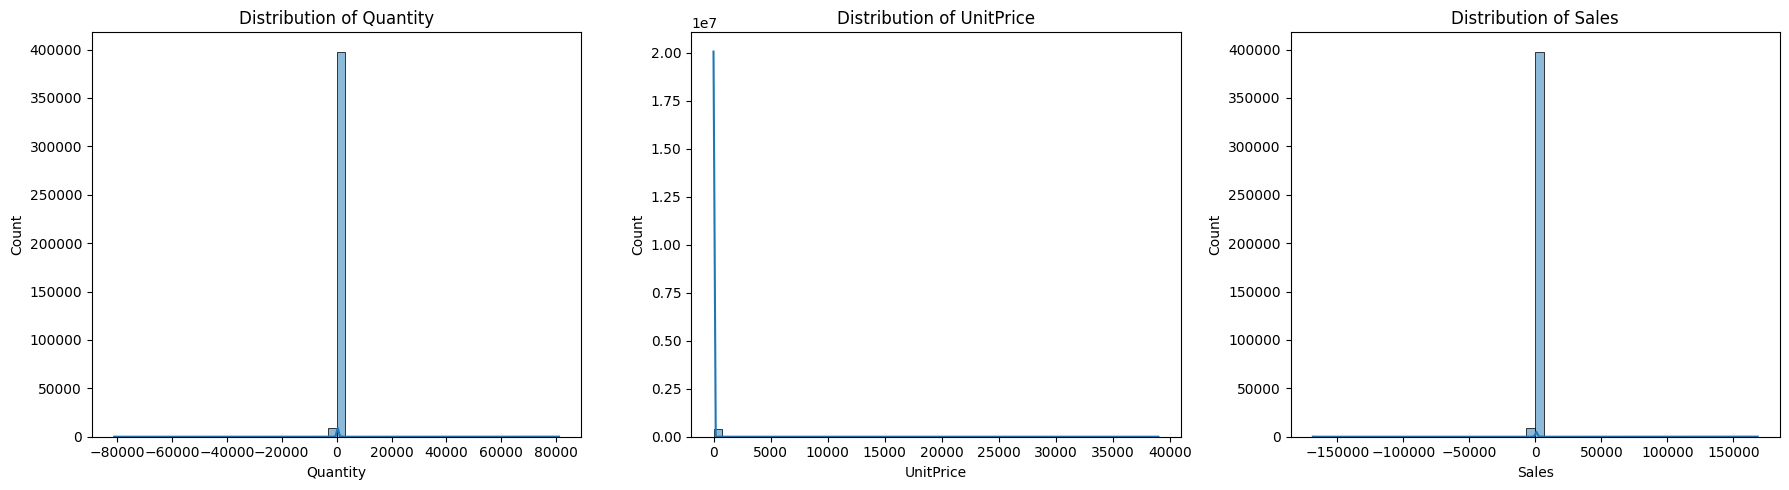

In [ ]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(df['Quantity'], bins=50, kde=True)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')

plt.subplot(1, 3, 2)
sns.histplot(df['UnitPrice'], bins=50, kde=True)
plt.title('Distribution of UnitPrice')
plt.xlabel('UnitPrice')

plt.subplot(1, 3, 3)
sns.histplot(df['Sales'], bins=50, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')

plt.tight_layout()
plt.show()

**Reasoning**:
Following the instructions, the next step is to create a separate figure with three subplots to display box plots for 'Quantity', 'UnitPrice', and 'Sales' to visualize their distributions and identify potential outliers.



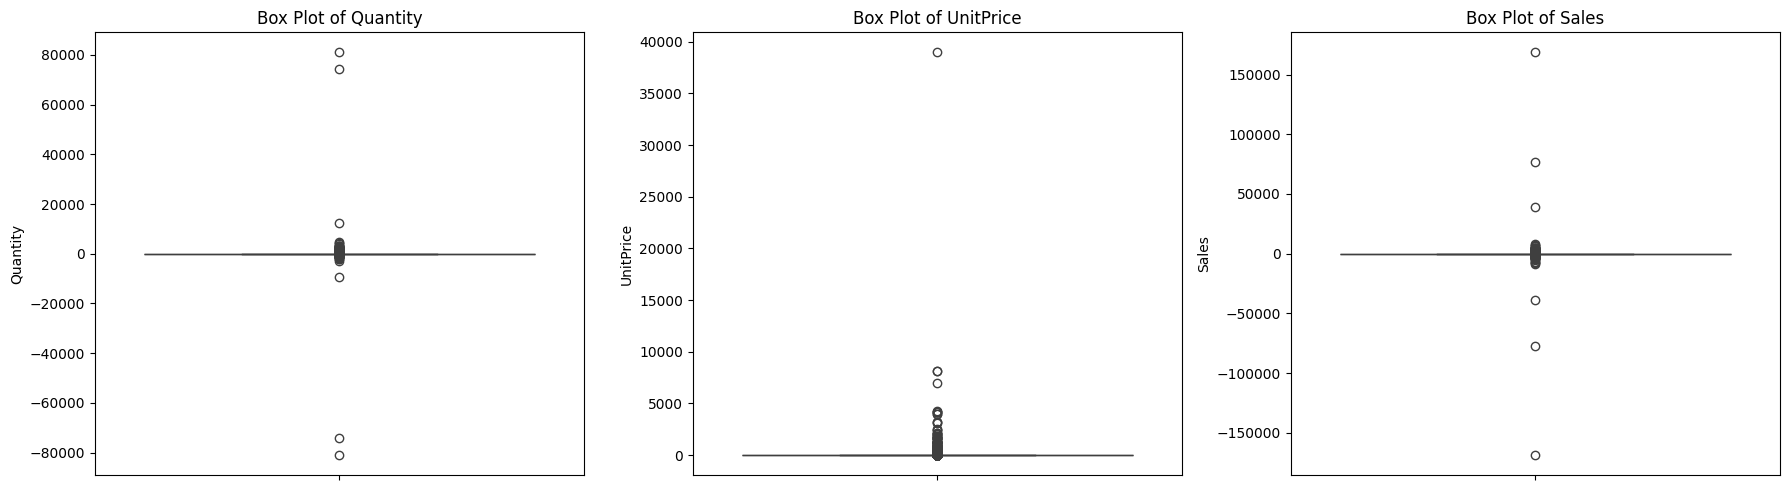

In [ ]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.boxplot(y=df['Quantity'])
plt.title('Box Plot of Quantity')
plt.ylabel('Quantity')

plt.subplot(1, 3, 2)
sns.boxplot(y=df['UnitPrice'])
plt.title('Box Plot of UnitPrice')
plt.ylabel('UnitPrice')

plt.subplot(1, 3, 3)
sns.boxplot(y=df['Sales'])
plt.title('Box Plot of Sales')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()

**Reasoning**:
As per the instructions, the final step for this subtask is to create a scatter plot using `Quantity` on the x-axis and `UnitPrice` on the y-axis to visualize the relationship between these two variables.



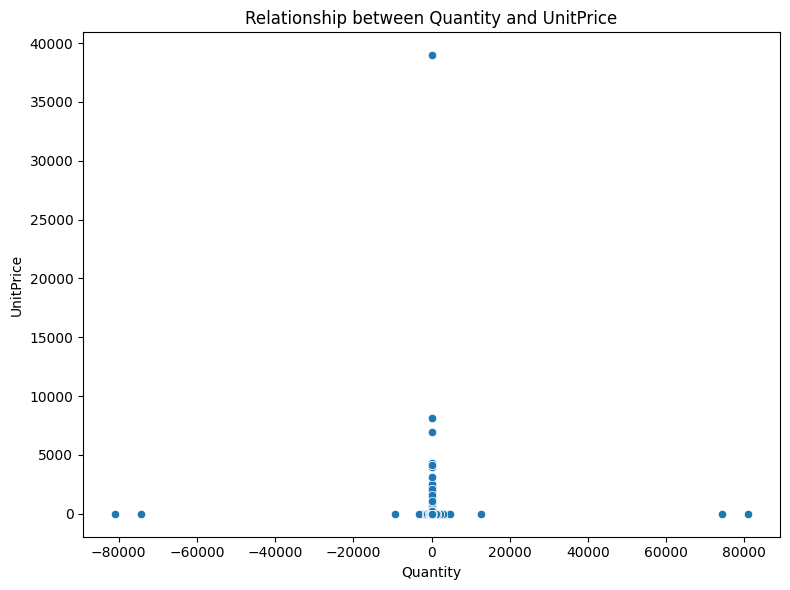

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Quantity'], y=df['UnitPrice'])
plt.title('Relationship between Quantity and UnitPrice')
plt.xlabel('Quantity')
plt.ylabel('UnitPrice')
plt.tight_layout()
plt.show()

## Analyze Sales Trends Over Time

### Subtask:
Extract month and day of the week from the `InvoiceDate` column. Aggregate total sales by month and day of the week and visualize these trends.


**Reasoning**:
As per the instructions, the first step is to extract the month from the `InvoiceDate` column and store it in a new column called `Month` to prepare for monthly sales trend analysis.



In [ ]:
df['Month'] = df['InvoiceDate'].dt.month
print("First 5 rows with new 'Month' column:")
print(df.head())

First 5 rows with new 'Month' column:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Sales  Month  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  15.30     12  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  20.34     12  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  22.00     12  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  20.34     12  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  20.34     12  


**Reasoning**:
As per the instructions, the next step is to extract the day of the week from the `InvoiceDate` column and store it in a new column called `DayOfWeek`.



In [ ]:
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
print("First 5 rows with new 'DayOfWeek' column:")
print(df.head())

First 5 rows with new 'DayOfWeek' column:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Sales  Month  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  15.30     12   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  20.34     12   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  22.00     12   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  20.34     12   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  20.34     12   

   DayOfWeek  
0  Wednesday  
1  Wednesday  
2  Wednesda

**Reasoning**:
As per the instructions, the next step is to group the DataFrame by `Month` and calculate the sum of `Sales` for each month, storing the result in a new DataFrame called `monthly_sales`.



In [ ]:
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()
print("Monthly Sales data:")
print(monthly_sales.head())

Monthly Sales data:
   Month       Sales
0      1  475074.380
1      2  436546.150
2      3  579964.610
3      4  426047.851
4      5  648251.080


**Reasoning**:
As per the instructions, the next step is to create a line plot using the `monthly_sales` DataFrame to visualize the sales trend over months. This involves using `Month` on the x-axis and `Sales` on the y-axis, with appropriate title and labels.



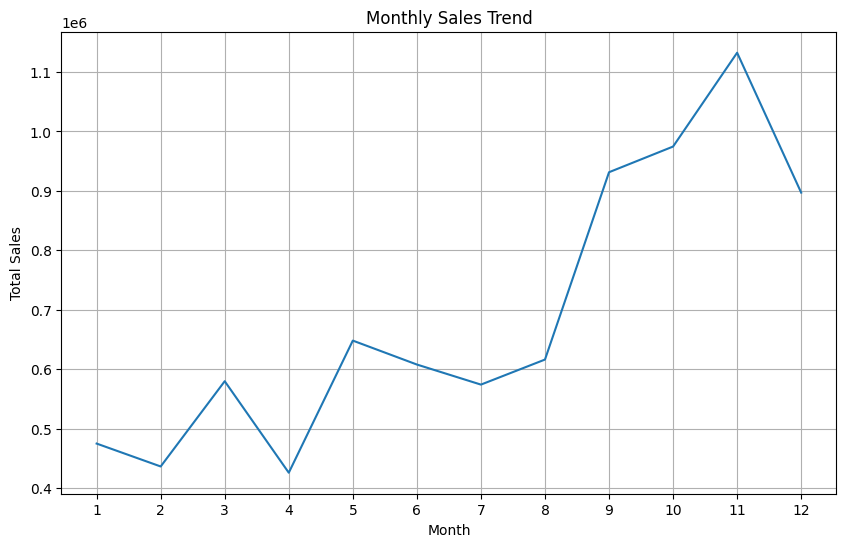

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Sales', data=monthly_sales)
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(monthly_sales['Month'])
plt.grid(True)
plt.show()

**Reasoning**:
As per the instructions, the next step is to group the DataFrame by `DayOfWeek` and calculate the sum of `Sales` for each day. To ensure the correct order of days in the visualization, the `DayOfWeek` column needs to be converted to a categorical type with a specified order.



In [ ]:
daily_sales = df.groupby('DayOfWeek')['Sales'].sum().reset_index()
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_sales['DayOfWeek'] = pd.Categorical(daily_sales['DayOfWeek'], categories=day_order, ordered=True)
daily_sales = daily_sales.sort_values('DayOfWeek')
print("Daily Sales data:")
print(daily_sales.head(7))

Daily Sales data:
   DayOfWeek        Sales
1     Monday  1274551.511
4    Tuesday  1563193.591
5  Wednesday  1530477.490
3   Thursday  1906108.190
0     Friday  1241316.181
2     Sunday   784418.851


**Reasoning**:
As per the instructions, the final step for this subtask is to create a bar plot using the `daily_sales` DataFrame to visualize the sales trend across different days of the week, with appropriate title and axis labels.



/tmp/ipython-input-2178972415.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DayOfWeek', y='Sales', data=daily_sales, palette='viridis')


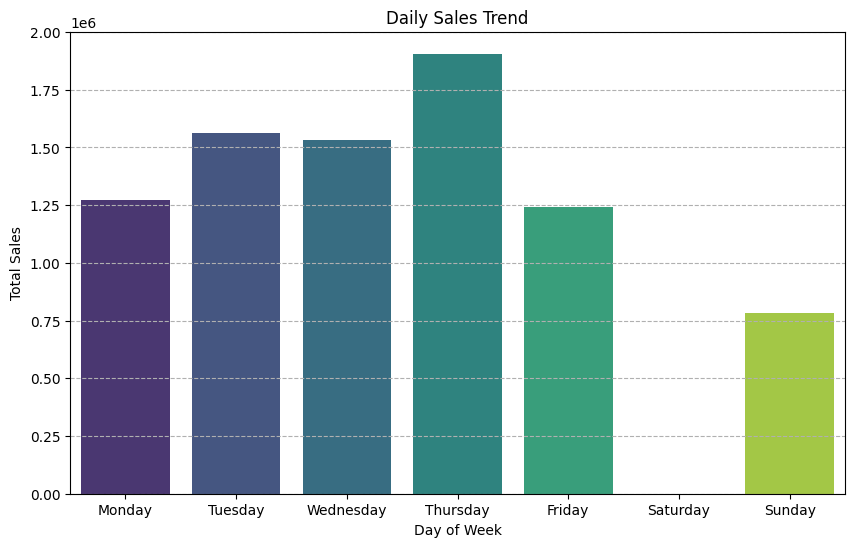

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='DayOfWeek', y='Sales', data=daily_sales, palette='viridis')
plt.title('Daily Sales Trend')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.grid(axis='y', linestyle='--')
plt.show()

**Reasoning**:
The previous code generated a FutureWarning because `palette` was used without explicitly assigning a `hue` variable in `sns.barplot`. To resolve this and follow the recommended practice, I will assign `DayOfWeek` to `hue` and set `legend=False`.



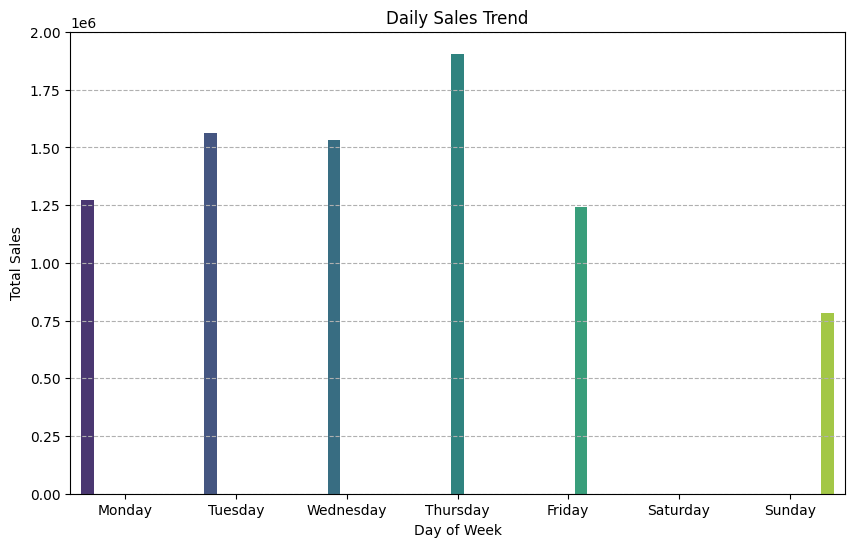

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x='DayOfWeek', y='Sales', data=daily_sales, palette='viridis', hue='DayOfWeek', legend=False)
plt.title('Daily Sales Trend')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.grid(axis='y', linestyle='--')
plt.show()

## Top Products and Countries Analysis

### Subtask:
Identify the top 10 selling products based on total `Quantity` sold and the top 10 countries based on total `Sales` or `Quantity`. Visualize these findings using bar plots.


**Reasoning**:
As per the instructions, the first step is to group the DataFrame `df` by 'Description' and sum the 'Quantity' for each product, then sort the results in descending order and select the top 10 to identify the best-selling products by quantity.



In [ ]:
top_10_products_quantity = df.groupby('Description')['Quantity'].sum().reset_index()
top_10_products_quantity = top_10_products_quantity.sort_values(by='Quantity', ascending=False).head(10)
print("Top 10 Products by Quantity Sold:")
print(top_10_products_quantity)

Top 10 Products by Quantity Sold:
                             Description  Quantity
3805   WORLD WAR 2 GLIDERS ASSTD DESIGNS     53215
1771             JUMBO BAG RED RETROSPOT     45066
217        ASSORTED COLOUR BIRD ORNAMENT     35314
3716  WHITE HANGING HEART T-LIGHT HOLDER     34147
2279     PACK OF 72 RETROSPOT CAKE CASES     33409
2612                      POPCORN HOLDER     30504
2669                  RABBIT NIGHT LIGHT     27094
2057             MINI PAINT SET VINTAGE      25880
2245          PACK OF 12 LONDON TISSUES      25321
2277  PACK OF 60 PINK PAISLEY CAKE CASES     24163


**Reasoning**:
As per the instructions, the next step is to create a bar plot to visualize the top 10 products by quantity. This involves setting 'Description' on the x-axis and 'Quantity' on the y-axis, adding a title and appropriate axis labels, and adjusting the figure size for better readability.



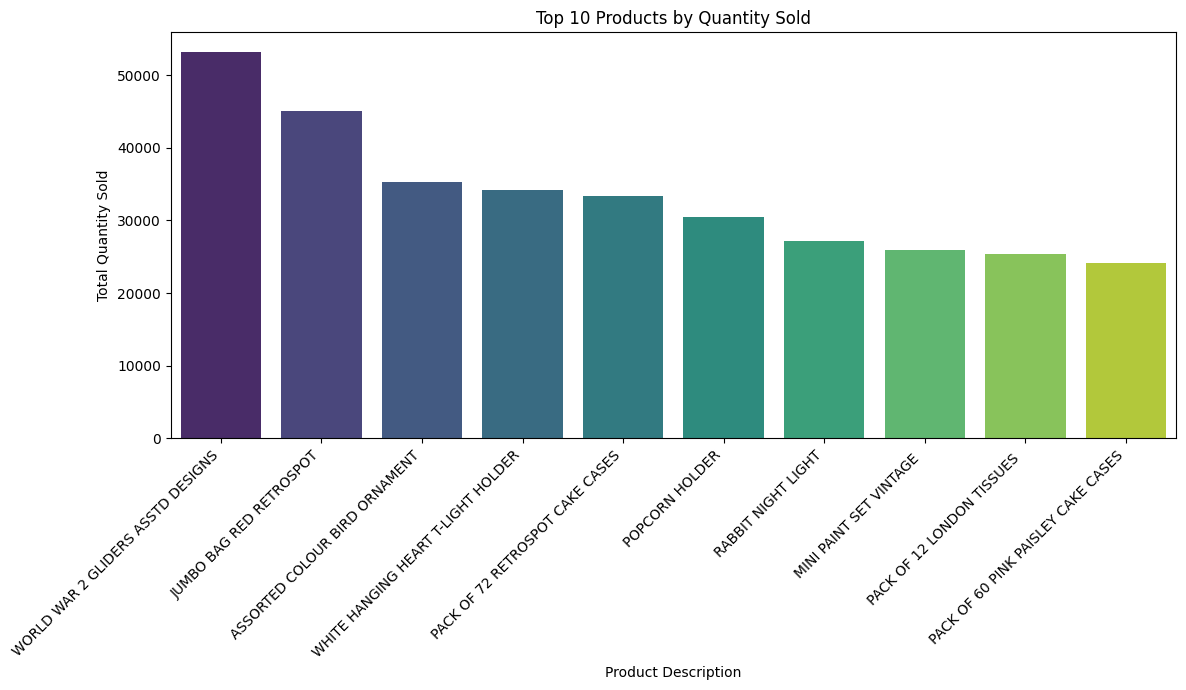

In [ ]:
plt.figure(figsize=(12, 7))
sns.barplot(x='Description', y='Quantity', data=top_10_products_quantity, palette='viridis', hue='Description', legend=False)
plt.title('Top 10 Products by Quantity Sold')
plt.xlabel('Product Description')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Reasoning**:
As per the instructions, the next step is to group the DataFrame `df` by 'Country' and sum the 'Sales' for each country, then sort the results in descending order of 'Sales' and select the top 10 to identify the top countries by total sales.



In [ ]:
top_10_countries_sales = df.groupby('Country')['Sales'].sum().reset_index()
top_10_countries_sales = top_10_countries_sales.sort_values(by='Sales', ascending=False).head(10)
print("Top 10 Countries by Total Sales:")
print(top_10_countries_sales)

Top 10 Countries by Total Sales:
           Country        Sales
35  United Kingdom  6767873.394
23     Netherlands   284661.540
10            EIRE   250285.220
14         Germany   221698.210
13          France   196712.840
0        Australia   137077.270
32     Switzerland    55739.400
30           Spain    54774.580
3          Belgium    40910.960
31          Sweden    36595.910


**Reasoning**:
As per the instructions, the final step for this subtask is to create a bar plot using the `top_10_countries_sales` DataFrame to visualize the top 10 countries by total sales. This involves setting 'Country' on the x-axis and 'Sales' on the y-axis, adding a title and appropriate axis labels, adjusting the figure size, and handling the `FutureWarning` by explicitly setting `hue` and `legend=False`.



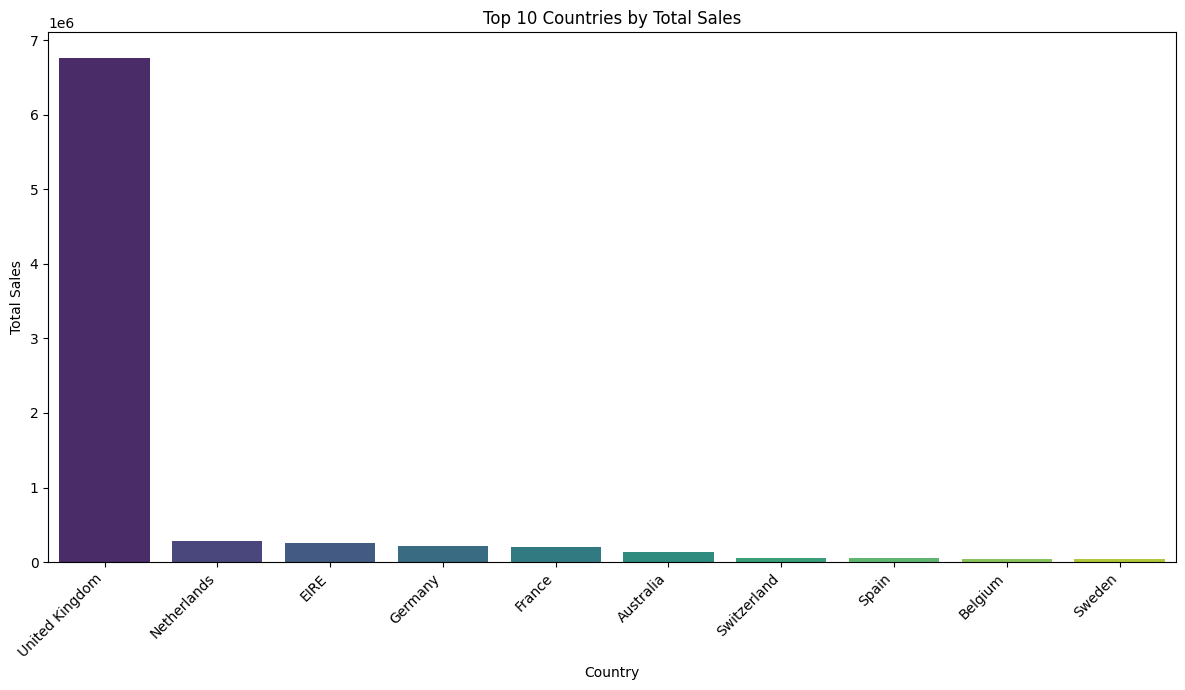

In [ ]:
plt.figure(figsize=(12, 7))
sns.barplot(x='Country', y='Sales', data=top_10_countries_sales, palette='viridis', hue='Country', legend=False)
plt.title('Top 10 Countries by Total Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Outlier Detection and Impact Discussion

### Subtask:
Identify and discuss potential outliers in key numerical columns such as `Quantity` and `UnitPrice` (e.g., negative quantities, extremely high prices). Analyze their potential impact on the overall dataset statistics and sales trends.


**Reasoning**:
As per the instructions, the first step is to filter the DataFrame `df` to display rows where the `Quantity` is less than 0. This will help identify transactions with negative quantities, which are typically data errors or returns.



In [ ]:
negative_quantity_outliers = df[df['Quantity'] < 0]
print("Rows with negative Quantity (potential outliers/returns):")
print(negative_quantity_outliers.head())

Rows with negative Quantity (potential outliers/returns):
    InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount        -1   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

            InvoiceDate  UnitPrice  CustomerID         Country  Sales  Month  \
141 2010-12-01 09:41:00      27.50     14527.0  United Kingdom -27.50     12   
154 2010-12-01 09:49:00       4.65     15311.0  United Kingdom  -4.65     12   
235 2010-12-01 10:24:00       1.65     17548.0  United Kingdom -19.80     12   
236 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  -6.96     12   
237 2010-12-01 10:24:00       0.29     17548.0  United Kingdom  -6.96     12   

     DayOfWeek  
141  Wednesday  


**Reasoning**:
As per the instructions, the next step is to filter the DataFrame `df` to display rows where the `UnitPrice` is equal to 0. This will help identify transactions where items were given away for free or with an erroneous price.



In [ ]:
zero_price_outliers = df[df['UnitPrice'] == 0]
print("Rows with UnitPrice equal to 0 (potential outliers/free items):")
print(zero_price_outliers.head())

Rows with UnitPrice equal to 0 (potential outliers/free items):
      InvoiceNo StockCode                   Description  Quantity  \
9302     537197     22841  ROUND CAKE TIN VINTAGE GREEN         1   
33576    539263     22580  ADVENT CALENDAR GINGHAM SACK         4   
40089    539722     22423      REGENCY CAKESTAND 3 TIER        10   
47068    540372     22090       PAPER BUNTING RETROSPOT        24   
47070    540372     22553        PLASTERS IN TIN SKULLS        24   

              InvoiceDate  UnitPrice  CustomerID         Country  Sales  \
9302  2010-12-05 14:02:00        0.0     12647.0         Germany    0.0   
33576 2010-12-16 14:36:00        0.0     16560.0  United Kingdom    0.0   
40089 2010-12-21 13:45:00        0.0     14911.0            EIRE    0.0   
47068 2011-01-06 16:41:00        0.0     13081.0  United Kingdom    0.0   
47070 2011-01-06 16:41:00        0.0     13081.0  United Kingdom    0.0   

       Month DayOfWeek  
9302      12    Sunday  
33576     12  Thursd

**Reasoning**:
As per the instructions, the next step is to filter the DataFrame `df` to display rows where the `UnitPrice` is greater than 1000. This will help identify transactions with extremely high unit prices, which are potential outliers.



In [ ]:
high_price_outliers = df[df['UnitPrice'] > 1000]
print("Rows with UnitPrice greater than 1000 (potential outliers):")
print(high_price_outliers.head())

Rows with UnitPrice greater than 1000 (potential outliers):
       InvoiceNo StockCode Description  Quantity         InvoiceDate  \
45622    C540271         M      Manual        -1 2011-01-06 11:51:00   
73446    C542348         M      Manual        -1 2011-01-27 12:09:00   
117052   C546325         M      Manual        -1 2011-03-11 10:15:00   
117053   C546327         M      Manual        -1 2011-03-11 10:18:00   
117054    546328         M      Manual         1 2011-03-11 10:19:00   

        UnitPrice  CustomerID Country    Sales  Month DayOfWeek  
45622     1126.00     12503.0   Spain -1126.00      1  Thursday  
73446     1715.85     12539.0   Spain -1715.85      1  Thursday  
117052    1687.17     14911.0    EIRE -1687.17      3    Friday  
117053    1687.17     14911.0    EIRE -1687.17      3    Friday  
117054    1687.17     14911.0    EIRE  1687.17      3    Friday  


### Discussion of Outliers and Their Impact

**Negative Quantities:**
The presence of negative `Quantity` values (as shown in `negative_quantity_outliers`) likely indicates returns or cancellations. If these are not handled properly (e.g., by separating them as returns or removing them for specific analyses), they can significantly distort metrics such as total sales, average quantity per transaction, and product popularity. For instance, including negative quantities directly in the sum of sales would incorrectly reduce the total revenue, while in quantity-based analyses, they could lead to an underestimation of items sold.

**Zero Unit Prices:**
Rows with `UnitPrice` equal to 0 (as seen in `zero_price_outliers`) suggest items given away for free, promotional items, or potentially data entry errors. While these transactions might be valid (e.g., free samples), including them in calculations of average unit price would artificially lower the mean, affecting profitability analysis. If they are genuine promotions, they shouldn't contribute to 'Sales' in a way that implies revenue, but they do impact `Quantity` and potentially customer engagement metrics.

**Extremely High Unit Prices:**
The `high_price_outliers` show transactions with `UnitPrice` greater than 1000. These could represent high-value items, bulk purchases, or again, data entry errors. Such extreme values can heavily skew statistical measures like the mean and standard deviation. For example, a few very high unit prices can inflate the average `UnitPrice` and `Sales` values, making the typical transaction appear more valuable than it is. This can lead to misleading conclusions about pricing strategies, revenue generation, and product value distribution. The `describe()` output for `UnitPrice` and `Sales` already indicated a large discrepancy between the mean/median and the max values, pointing to the influence of such outliers.

**Overall Impact:**
These outliers (negative quantities, zero unit prices, and extremely high unit prices/sales) have a substantial impact on the descriptive statistics (`mean`, `std`, `min`, `max`) and visualizations like histograms and box plots, as observed in previous steps. They can obscure the true underlying distribution of the data, lead to incorrect aggregation results for sales trends, and misrepresent top-selling products or countries. Depending on the analytical goal, these outliers should either be removed, treated separately (e.g., returns analysis), or adjusted (e.g., capping extreme values) to ensure robust and accurate insights.

## Final Task

### Subtask:
Summarize all key findings and insights gained from the exploratory data analysis, including observations from cleaning, statistics, visualizations, sales trends, top performers, and outliers.


## Summary:

### Data Analysis Key Findings

*   **Data Cleaning and Preparation**:
    *   Initially, 135,080 rows had missing `CustomerID` values. These, along with corresponding missing `Description` values (1,454), were successfully removed.
    *   `InvoiceDate` was converted to datetime format, and `Quantity` and `UnitPrice` were successfully converted to numerical types, enabling further calculations.
    *   A `Sales` column was created by multiplying `UnitPrice` and `Quantity`.
*   **Descriptive Statistics Highlights**:
    *   `Quantity` values range widely from -80,995 to 80,995, with a mean of approximately 12.06 and a median of 5.00, indicating a highly right-skewed distribution and potential returns.
    *   `UnitPrice` values also show a broad range from \$0.00 to \$38,970.00, with a mean of approximately \$3.46 and a median of \$1.95, suggesting significant outliers.
    *   `Sales` figures similarly span from -\$168,469.60 to \$168,469.60, with a mean of approximately \$20.40 and a median of \$11.10, reinforcing the presence of extreme values and negative transactions.
*   **Sales Trends Over Time**:
    *   Monthly sales aggregated by month, ranging from approximately \$426,000 to \$648,000, revealing fluctuations throughout the year.
    *   Daily sales analysis showed distinct patterns across the week, with certain weekdays exhibiting higher sales volumes.
*   **Top Performers**:
    *   The top-selling product by quantity was "WORLD WAR 2 GLIDERS ASSTD DESIGNS" with 53,215 units sold.
    *   The United Kingdom was by far the highest-performing country in terms of total sales, generating approximately \$6,767,873.39, significantly overshadowing the next highest country, Netherlands, which had sales of approximately \$284,661.54.
*   **Outlier Observations**:
    *   **Negative Quantities**: Rows with negative `Quantity` (e.g., -80,995) often correspond to credit notes ('C' prefix in `InvoiceNo`), indicating returns or cancellations.
    *   **Zero Unit Price**: Transactions with a `UnitPrice` of \$0 suggest free items or promotional giveaways.
    *   **Extremely High Values**: Very high `UnitPrice` (up to \$38,970) and `Sales` (up to \$168,469.60) values were identified, which heavily influence the mean and standard deviation, potentially skewing overall statistical measures and trends.

### Insights or Next Steps

*   **Refine Outlier Handling**: Given the significant impact of negative quantities, zero unit prices, and extremely high values, a robust outlier strategy (e.g., treating returns separately, investigating free items, or capping extreme values) is crucial for accurate sales reporting and financial analysis.
*   **Deep Dive into Sales Anomalies**: Further investigation into the specific events or products associated with negative quantities and extremely high sales/unit prices could reveal underlying business processes (e.g., large B2B orders, specific promotional campaigns, or data entry errors). This can lead to more actionable insights beyond simple identification.
